# Required Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, auc


# Load Dataset

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Handle Missing Values 

In [3]:
cols=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols]=df[cols].replace(0,np.nan)

imputer=KNNImputer(n_neighbors=5)
df[cols]=imputer.fit_transform(df[cols])

# Dataset Info 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Statistics

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.748698,72.348958,28.887240,150.321615,32.453021,0.471876,33.240885,0.348958
std,3.369578,30.463612,12.194234,9.491386,98.520049,6.883921,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,85.450000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.800000,129.300000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,188.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature Correlation Matrix 

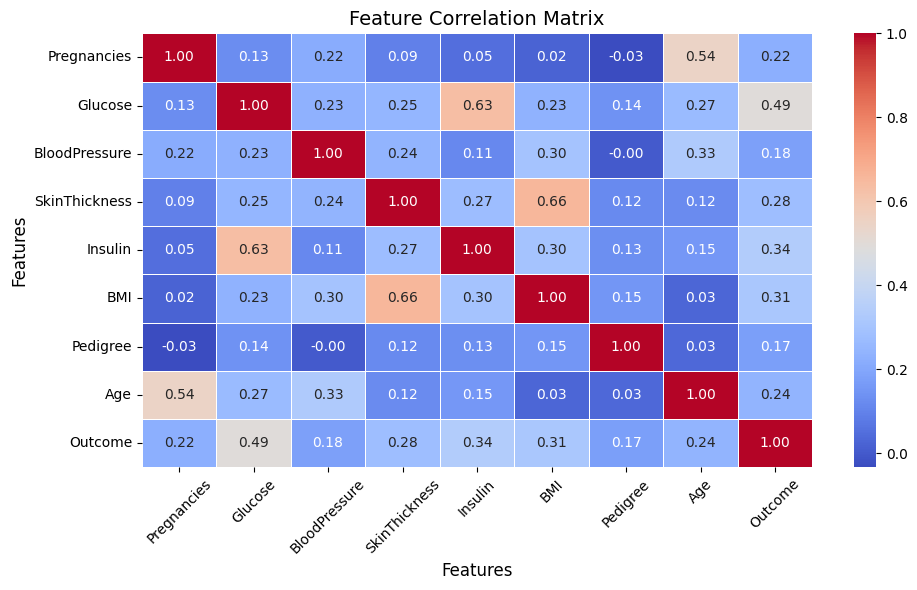

In [6]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Matrix', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Features 

In [7]:
X=df.drop('Outcome', axis=1)
y=df['Outcome']

# Spliting Data

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,
                                                 random_state=42)


# Standard Scaler

In [9]:
scaler=StandardScaler()
sX_train=scaler.fit_transform(X_train)
sX_test=scaler.transform(X_test)

# Model KNN

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(sX_train, y_train)
y_pred=knn.predict(sX_test)

# Accuracy Score 

In [11]:
accuracy=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Accuracy :', accuracy)
print('classification Report :')
print(cr)

Accuracy : 0.7489177489177489
classification Report :
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.63      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



# confusion Matrix 

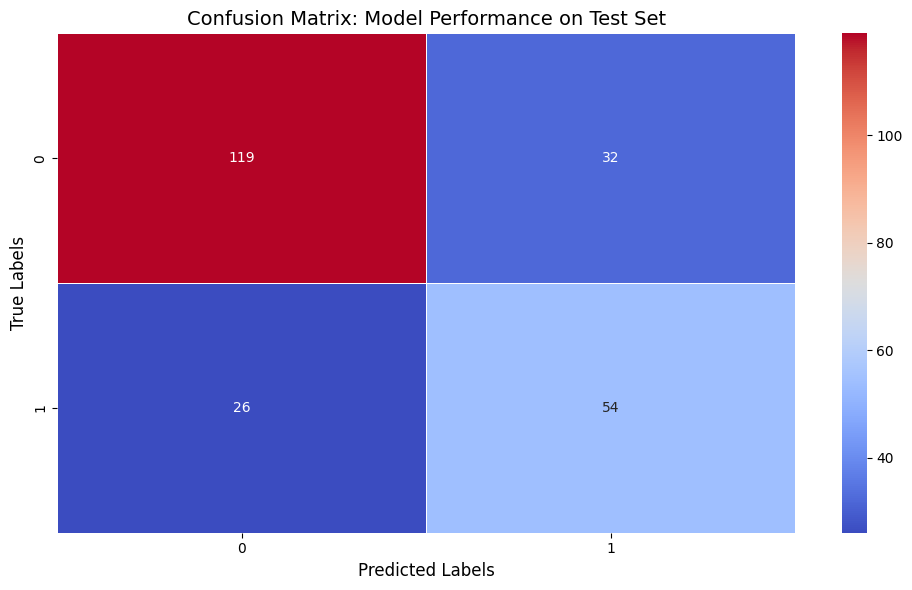

In [12]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidth=0.5, fmt='d')

plt.title('Confusion Matrix: Model Performance on Test Set', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()

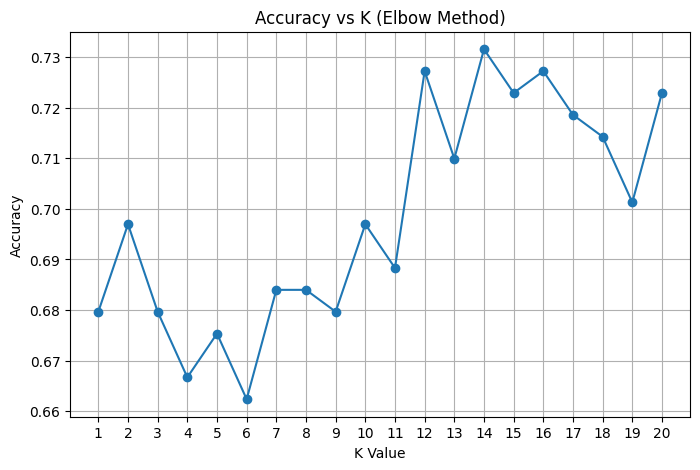

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)   
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K (Elbow Method)")
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()
